In [9]:
df<-read.csv('d:/data/university/data.csv')
head(df)

quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,class
7,9,1,1,1,1,5,100.00,1
9,17,3,12,4,4,1,91.67,1
17,11,5,4,2,2,15,89.50,1
10,24,4,16,16,11,50,86.17,1
2,29,7,37,22,22,18,85.21,1
8,14,2,53,33,26,101,82.50,1


In [10]:
library(dplyr)
df<-df %>% select(-score) #score 필드는 제외

In [11]:
dim(df) #데이터의 차원
summary(df) #기초통계량

[1] 2200    8

 quality_of_education alumni_employment quality_of_faculty  publications   
 Min.   :  1.0        Min.   :  1.0     Min.   :  1.0      Min.   :   1.0  
 1st Qu.:175.8        1st Qu.:175.8     1st Qu.:175.8      1st Qu.: 175.8  
 Median :355.0        Median :450.5     Median :210.0      Median : 450.5  
 Mean   :275.1        Mean   :357.1     Mean   :178.9      Mean   : 459.9  
 3rd Qu.:367.0        3rd Qu.:478.0     3rd Qu.:218.0      3rd Qu.: 725.0  
 Max.   :367.0        Max.   :567.0     Max.   :218.0      Max.   :1000.0  
   influence       citations        patents          class       
 Min.   :  1.0   Min.   :  1.0   Min.   :  1.0   Min.   :0.0000  
 1st Qu.:175.8   1st Qu.:161.0   1st Qu.:170.8   1st Qu.:0.0000  
 Median :450.5   Median :406.0   Median :426.0   Median :0.0000  
 Mean   :459.8   Mean   :413.4   Mean   :433.3   Mean   :0.2336  
 3rd Qu.:725.2   3rd Qu.:645.0   3rd Qu.:714.2   3rd Qu.:0.0000  
 Max.   :991.0   Max.   :812.0   Max.   :871.0   Max.   :1.0000  

In [12]:
(corrmatrix<-cor(df)) #상관계수 행렬

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,class
quality_of_education,1.0000000,0.6064206,0.7861806,0.6246568,0.6456406,0.6304553,0.5281200,-0.6298041
alumni_employment,0.6064206,1.0000000,0.5586183,0.5720960,0.5273823,0.5592002,0.5282193,-0.5515769
quality_of_faculty,0.7861806,0.5586183,1.0000000,0.6344229,0.6564058,0.6521864,0.5551074,-0.6763612
publications,0.6246568,0.5720960,0.6344229,1.0000000,0.8749516,0.8299117,0.6715581,-0.6490623
influence,0.6456406,0.5273823,0.6564058,0.8749516,1.0000000,0.8452068,0.6118114,-0.6473828
citations,0.6304553,0.5592002,0.6521864,0.8299117,0.8452068,1.0000000,0.5987279,-0.6510523
patents,0.5281200,0.5282193,0.5551074,0.6715581,0.6118114,0.5987279,1.0000000,-0.5454657
class,-0.6298041,-0.5515769,-0.6763612,-0.6490623,-0.6473828,-0.6510523,-0.5454657,1.0000000


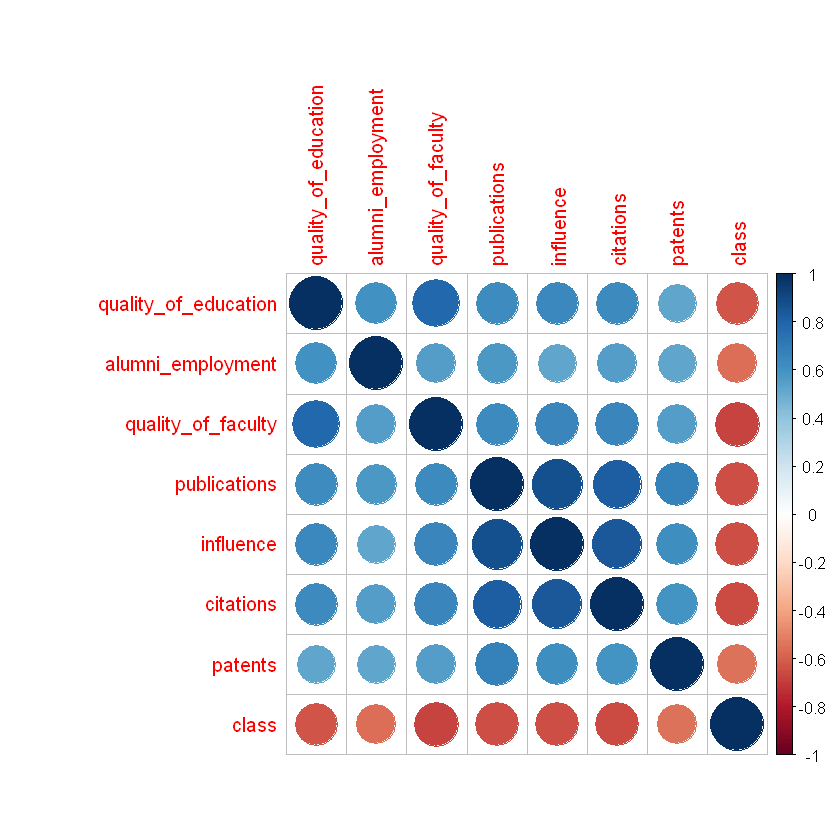

In [13]:
library(corrplot)
corrplot(corrmatrix,method='circle')


   0    1 
1686  514 

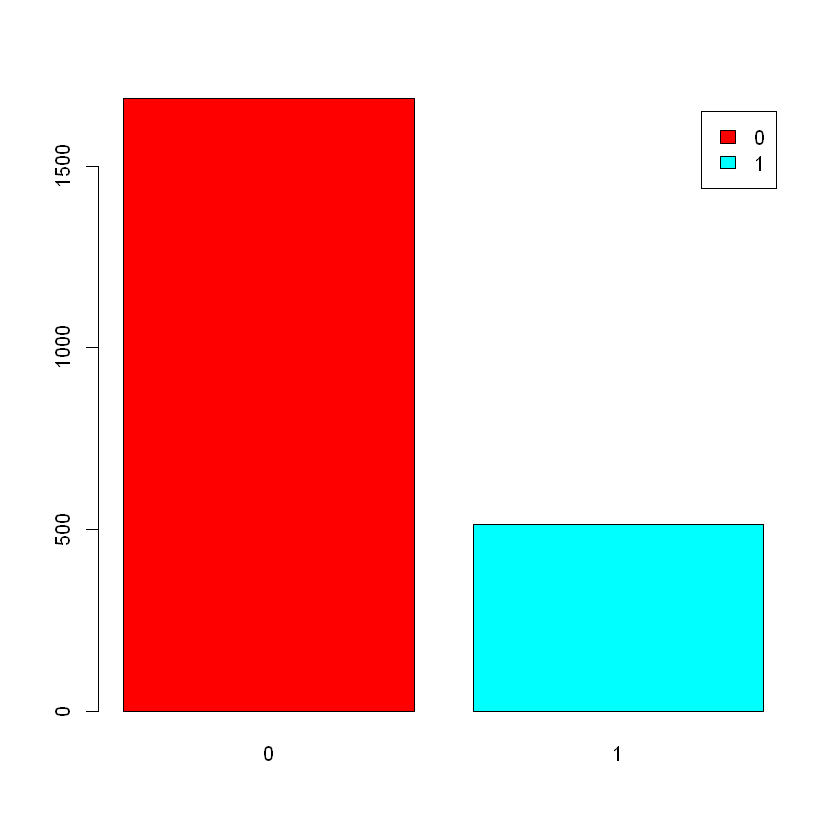

In [14]:
tbl<-table(df$class)
tbl
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트 플롯

In [15]:
library(ROSE)
df_samp<-ovun.sample(class ~. , data=df,seed=1,method='under',
                    N=514*2)$data # 0 514 1 514로 언더샘플링
(tbl<-table(df_samp$class))


  0   1 
514 514 

In [30]:
library(caret)
set.seed(123) #랜덤시드 고정
#p=0,8 학습용 80% 검증용 20%
idx_train<-createDataPartition(y=df_samp$class,p=0.8,list=F)
train<-df_samp[idx_train,] #학습용
X_train<-train[,-8] #독립변수
y_train<-train[,8] #종속변수
test<-df_samp[-idx_train,]#검증용
X_test<-test[,-8]
y_test<-test[,8]

In [31]:
model<-glm(class ~. , data=train, family=binomial) #로지스틱 회귀분석 모형
summary(model)


Call:
glm(formula = class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7718  -0.1684   0.0465   0.3294   3.5053  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           5.0110200  0.4461676  11.231  < 2e-16 ***
quality_of_education -0.0010198  0.0014579  -0.699 0.484269    
alumni_employment    -0.0030271  0.0007786  -3.888 0.000101 ***
quality_of_faculty   -0.0048705  0.0028542  -1.706 0.087929 .  
publications         -0.0040763  0.0014359  -2.839 0.004526 ** 
influence            -0.0028432  0.0014376  -1.978 0.047951 *  
citations            -0.0036300  0.0014259  -2.546 0.010902 *  
patents              -0.0007749  0.0006340  -1.222 0.221651    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1142.31  on 823  degrees of freedom
Residual deviance:  373.06  on 816  degrees of fr

In [32]:
(coef1<-coef(model)) #상관계수

(Intercept) quality_of_education    alumni_employment 
        5.0110200448        -0.0010197517        -0.0030271447 
  quality_of_faculty         publications            influence 
       -0.0048705235        -0.0040763177        -0.0028432333 
           citations              patents 
       -0.0036300070        -0.0007749036

In [33]:
pred<-predict(model,newdata=X_test,type='response') #검증용데이터셋
result<-ifelse(pred>0.5,1,0)

In [34]:
mean(y_test==result) #예측정확도

[1] 0.9362745

In [35]:
table(y_test,result) #오분류표

      result
y_test   0   1
     0  90  12
     1   1 101